<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework_3_ML/Homework_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 2 (20pts):

a. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your classification accuracy over iterations. Also, report your results, including accuracy, precision, recall, and F1 score. At the end, plot the confusion matrix representing your binary classifier.




In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


In [21]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML_ECGR5105/cancer.csv")
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [22]:
#checking nan values
nan_counts = df.isna().sum()
print(nan_counts)
#droping 'Unnamed: 32' since all values are null
df = df.drop(columns=['Unnamed: 32'])

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Iteration 1 - Accuracy: 0.9736842105263158, Precision: 0.9761904761904762, Recall: 0.9534883720930233, F1 Score: 0.9647058823529412
Iteration 2 - Accuracy: 0.9736842105263158, Precision: 0.9761904761904762, Recall: 0.9534883720930233, F1 Score: 0.9647058823529412
Iteration 3 - Accuracy: 0.9736842105263158, Precision: 0.9761904761904762, Recall: 0.9534883720930233, F1 Score: 0.9647058823529412
Iteration 4 - Accuracy: 0.9736842105263158, Precision: 0.9761904761904762, Recall: 0.9534883720930233, F1 Score: 0.9647058823529412
Iteration 5 - Accuracy: 0.9736842105263158, Precision: 0.9761904761904762, Recall: 0.9534883720930233, F1 Score: 0.9647058823529412
standardize results
Final Accuracy: 0.9736842105263158
Final Precision: 0.9761904761904762
Final Recall: 0.9534883720930233
Final F1 Score: 0.9647058823529412
Confusion Matrix:
[[70  1]
 [ 2 41]]


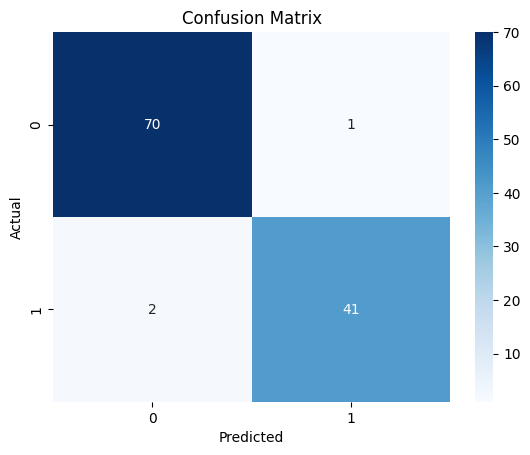

In [23]:

# Define features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Assuming 'Diagnosis' is the target column
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize empty lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations=5

for i in range(iterations):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')  # Assuming Malignant is the positive class
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')

    # Store metrics in the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Iteration {i+1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Now, you can use 'model' for further predictions or analysis
y_pred = model.predict(X_test)

# Calculate other metrics for the final model
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print('standardize results')
print(f'Final Accuracy: {accuracy}')
print(f'Final Precision: {precision}')
print(f'Final Recall: {recall}')
print(f'Final F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Lets try with Normalization

Iteration 1 - Accuracy: 0.9824561403508771, Precision: 1.0, Recall: 0.9534883720930233, F1 Score: 0.9761904761904763
Iteration 2 - Accuracy: 0.9824561403508771, Precision: 1.0, Recall: 0.9534883720930233, F1 Score: 0.9761904761904763
Iteration 3 - Accuracy: 0.9824561403508771, Precision: 1.0, Recall: 0.9534883720930233, F1 Score: 0.9761904761904763
Iteration 4 - Accuracy: 0.9824561403508771, Precision: 1.0, Recall: 0.9534883720930233, F1 Score: 0.9761904761904763
Iteration 5 - Accuracy: 0.9824561403508771, Precision: 1.0, Recall: 0.9534883720930233, F1 Score: 0.9761904761904763
Normalize results
Final Accuracy: 0.9824561403508771
Final Precision: 1.0
Final Recall: 0.9534883720930233
Final F1 Score: 0.9761904761904763
Confusion Matrix:
[[71  0]
 [ 2 41]]


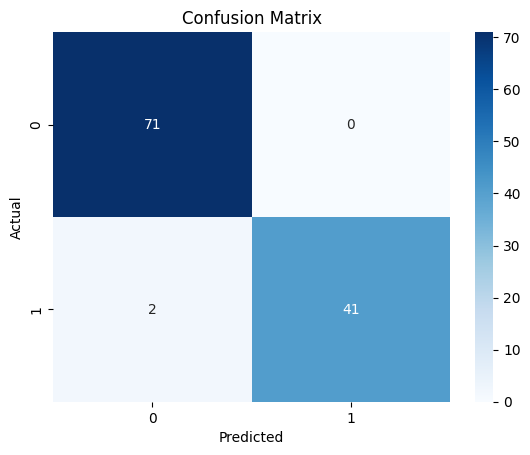

In [24]:

# Normalize the features (min-max scaling)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize empty lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 5

for i in range(iterations):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')  # Assuming Malignant is the positive class
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')

    # Store metrics in the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Iteration {i+1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Now, you can use 'model' for further predictions or analysis
y_pred = model.predict(X_test)

# Calculate other metrics for the final model
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print('Normalize results')

print(f'Final Accuracy: {accuracy}')
print(f'Final Precision: {precision}')
print(f'Final Recall: {recall}')
print(f'Final F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Explainantion

standardize results

Final Accuracy: 0.9736842105263158

Final Precision: 0.9761904761904762

Final Recall: 0.9534883720930233

Final F1 Score: 0.9647058823529412

Confusion Matrix:

[70   1]

[2  41]

Normalize results

Final Accuracy: 0.9824561403508771

Final Precision: 1.0

Final Recall: 0.9534883720930233

Final F1 Score: 0.9761904761904763

Confusion Matrix:

[71  0]

[2 41]

format for confusion matrix

[TP FP]

[FN TN]


Since, this is cancer related issue my understanding is it should have less false negatives cases. In any condition precision would be good option. Normalizing gives us the best results as it is decreasing the number of False positives and we are getting better accuracy.

b. How about adding a weight penalty here, considering the number of parameters? Add the weight penalty repeat the training, and report the results.



**Since Normalize giving us the better result i will implement this with it**

Iteration 1 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 2 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 3 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 4 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 5 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 6 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 7 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 8 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.9302325581395349, F1 Score: 0.963855421686747
Iteration 9 - Accuracy: 0.9736842105263158, Precision: 1.0, Recall: 0.93

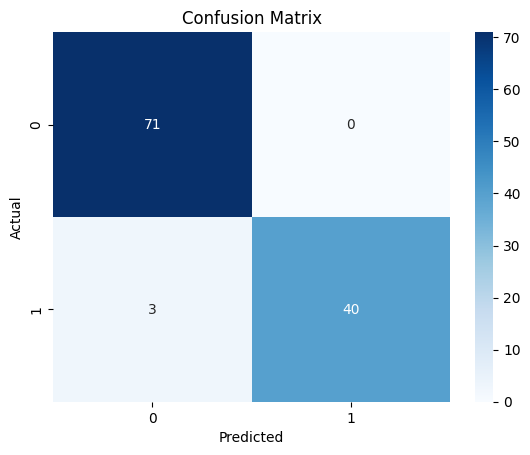

In [28]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (min-max scaling)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model with L2 penalty (Ridge)
model = LogisticRegression(penalty='l2', solver='liblinear')
# Initialize empty lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Assuming you have a loop for iterations
for i in range(iterations):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')  # Assuming Malignant is the positive class
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')

    # Store metrics in the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Iteration {i+1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Now, you can use 'model' for further predictions or analysis
y_pred = model.predict(X_test)

# Calculate other metrics for the final model
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Final Accuracy: {accuracy}')
print(f'Final Precision: {precision}')
print(f'Final Recall: {recall}')
print(f'Final F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Explaination**

**Before adding weight penalty**

Normalize results

Final Accuracy: 0.9824561403508771

Final Precision: 1.0

Final Recall: 0.9534883720930233

Final F1 Score: 0.9761904761904763

Confusion Matrix:
[71 0]
[2 41]
format for confusion matrix
[TP FP]
[FN TN]

**After adding weight penalty**

Final Accuracy: 0.9736842105263158

Final Precision: 1.0

Final Recall: 0.9302325581395349

Final F1 Score: 0.963855421686747

Confusion Matrix:
[[71  0]
 [ 3 40]]

The addition of a penalty term helped to regularize our model and prevent overfitting up to some extent (very slightly but yes) confusion matrix- in Normalize method we have 0 false positive cases, However, we have False negative increase by 1 but on the other hand true negative decreased by 1, our desired goal for cancer data should be to decrease the number of False negative results, Based on confusion matrix better model was without adding penalties(this is based on cancer scenario assumptions).

